In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import math
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [ ]:
dataset_path = "/content/drive/My Drive/GreatLearning/StaticsInsurance/insurance.csv"

In [ ]:
#Reading Dataset and Displaying
dataset = pd.read_csv(dataset_path)
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
#Shapr of the dataset
dataset.shape

(1338, 7)

In [ ]:
#dataset information
print("dataset information")
dataset.info()
print()
print("dataset column types")
dataset.dtypes

dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

dataset column types


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#checking for null values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#5 point summary of numerical values
dn=dataset[['age','bmi','children','charges']]
dn.describe()
#help(dn.describe)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


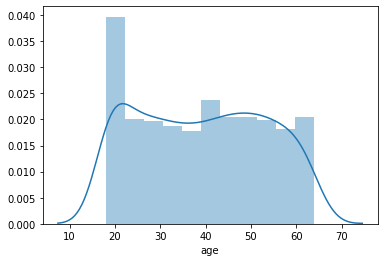

In [ ]:
nd= dataset[['age','bmi','children','charges']]
#Disturbution Plot For Age
sbn.distplot(nd['age'])

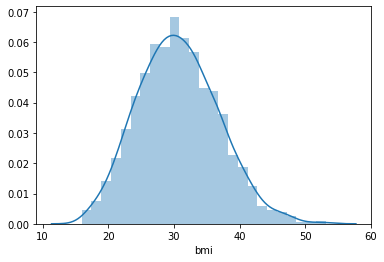

In [ ]:
#Disturbution Plot For Bmi
sbn.distplot(nd['bmi'])

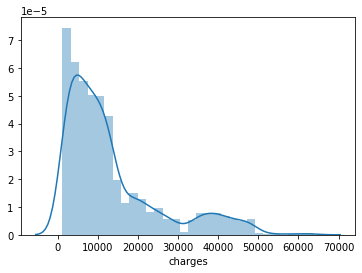

In [ ]:
#Disturbution Plot For 
sbn.distplot(nd['charges'])

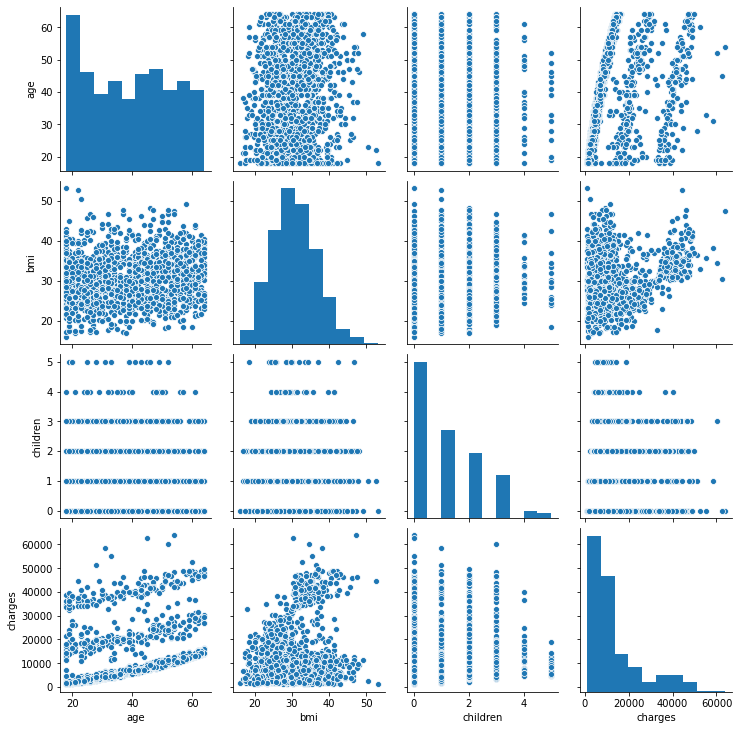

In [ ]:
sbn.pairplot(dataset)

In [ ]:
#Measure skewness
dataset[['bmi', 'age', 'charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

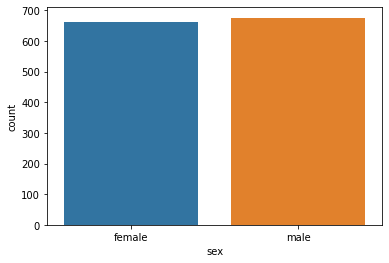

In [ ]:
#Ploting Frequency Disturbution for categiry sex
sbn.countplot(dataset['sex'])

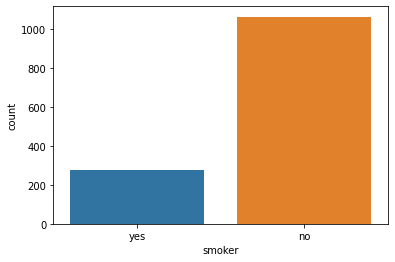

In [ ]:
#Ploting Frequency Disturbution for categorical var smoker
sbn.countplot(dataset['smoker'])

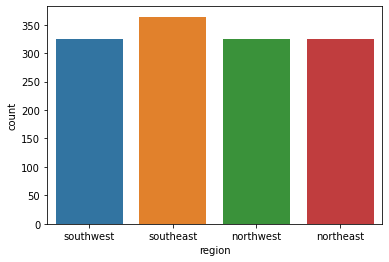

In [ ]:
#Ploting Frequency Disturbution for categorical var region
sbn.countplot(dataset['region'])

**Graphical Representation of outlliers with box plot**

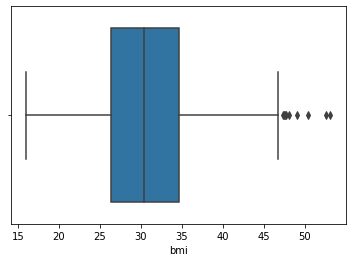

In [ ]:
#Finding Outliers in bmi by plotting boxplot
sbn.boxplot(dataset['bmi'])

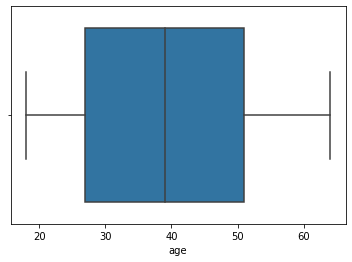

In [ ]:
#Finding Outliers in bmi by plotting boxplot
sbn.boxplot(dataset['age'])

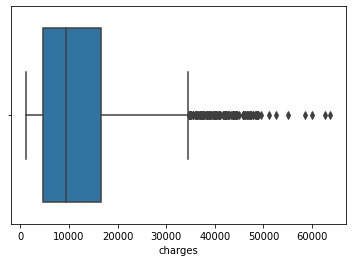

In [ ]:
#Finding Outliers in Charges by plotting boxplot
sbn.boxplot(dataset['charges'])

**Finding outliers in data set of bmi, age and charges**

In [ ]:
#Finding over all Outlie from bmi, age, charges columns
z_score = np.abs(stats.zscore(dataset[['bmi', 'age', 'charges']]))
outliers = np.where(z_score > 3)
outlier_val = [z_score[r][c] for r, c in zip(outliers[0], outliers[1])]
outlier_val

[3.132806075214621,
 3.0178611981425605,
 4.17166316317004,
 3.7421592200817297,
 3.45834800583167,
 3.234399911917402,
 3.595297768208803,
 3.248148025811295,
 3.8619664391173902,
 4.074388669634486,
 3.685522232281654]

**Finding Outliers individual**

In [ ]:
thrushold = 3
#Finding Outlie in bmi
z_score_bmi = np.abs(stats.zscore(dataset['bmi']))
outliers_bmi = np.where(z_score_bmi > thrushold)
outliers_bmi_val = [z_score_bmi[ib] for ib in outliers_bmi]
outliers_bmi_val[0]

array([3.0178612 , 3.23439991, 3.59529777, 3.68552223])

In [ ]:
#Finding Outlie in age
z_score_age = np.abs(stats.zscore(dataset['age']))
outliers_age = np.where(z_score_age > thrushold)
outliers_age_val = [z_score_bmi[ia] for ia in outliers_age]
outliers_age_val[0]

array([], dtype=float64)

In [ ]:
#Finding Outlie in charges
z_score_charges = np.abs(stats.zscore(dataset['charges']))
outliers_charges = np.where(z_score_charges > thrushold)
outliers_charges_val = [z_score_charges[ic] for ic in outliers_charges]
outliers_charges_val[0]

array([3.13280608, 4.17166316, 3.74215922, 3.45834801, 3.24814803,
       3.86196644, 4.07438867])

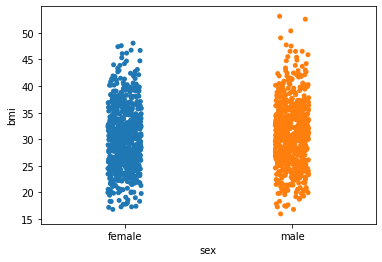

In [ ]:
#Does bmi of males differ significantly from that of females
sbn.stripplot(x=dataset['sex'], y=dataset['bmi'])

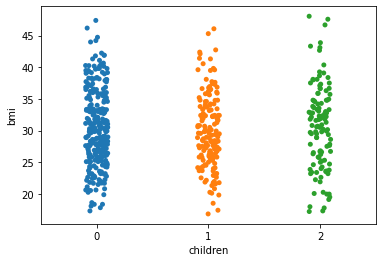

In [ ]:
#Is the distribution of bmi across women with no children, one child and two children, the same	
data_child = dataset[dataset['sex'] == 'female'] 
data_child = data_child[(data_child['children'] == 0) | (data_child['children'] == 1) 
              | (data_child['children'] == 2)]
sbn.stripplot(x=data_child['children'], y=data_child['bmi'])

**Individual Disturbution Plot**

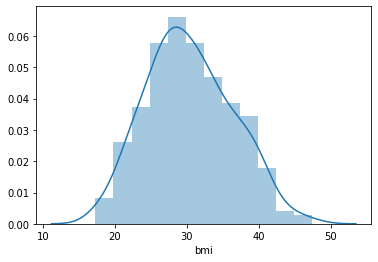

In [ ]:
#Distribution of bmi across women with no children
sbn.distplot(data_child[data_child['children'] == 0]['bmi'])

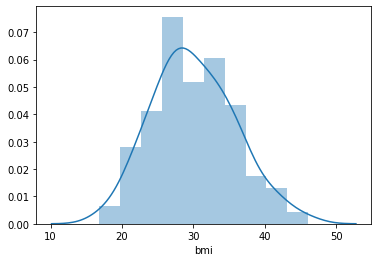

In [ ]:
#Distribution of bmi across women with one children
sbn.distplot(data_child[data_child['children'] == 1]['bmi'])

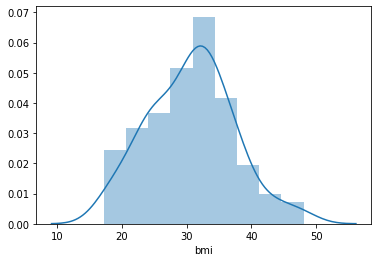

In [ ]:
#Distribution of bmi across women with two children
sbn.distplot(data_child[data_child['children'] == 2]['bmi'])

Looking at the above disturbutions for women with no children, one child and two children, The disturbution appears to be
 nearly same

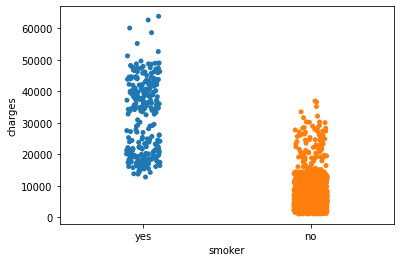

In [ ]:
#Do charges of people who smoke differ significantly from the people who don't?	
sbn.stripplot(x=dataset["smoker"], y=dataset["charges"])

From the above plot we can conclude that there are peopel whose charges are as same as non smokers and some non smokers charges whose charges are as same as some somkers but more likely to say that the charge yes charges will differ significatly from the people who don't

Is the proportion of smokers significantly different in different genders	

In [ ]:
smoker_ds = dataset[dataset['smoker'] == 'yes']
total_smoker = smoker_ds.shape[0]
print("Total Smoker Count: {}".format(total_smoker))

Total Smoker Count: 274


In [ ]:
smoker_male = smoker_ds[smoker_ds['sex'] == 'male']
total_male_smokers = smoker_male.shape[0]
print("Male Smoker Count: {}".format(total_male_smokers))

Male Smoker Count: 159


In [ ]:
smoker_female = smoker_ds[smoker_ds['sex'] == 'female']
total_female_smokers = smoker_female.shape[0]
print("Female Smoker Count: {}".format(total_female_smokers))

Female Smoker Count: 115


 Male Smokers Proportion calculated by **total_male_smokers/total_smokers**

In [ ]:
male_smoker_proportion = total_male_smokers/total_smoker
print("Male Smoker Prortion: {}".format(male_smoker_proportion))

Male Smoker Prortion: 0.5802919708029197


Because there are only to categories so the female proportion can be calculate by using **1 - male_smoker_proportion** because if we add the two proportion it becomes is 1 else the formula to calculate the female proportion is **total_female_smokers/total_smoker** 

In [ ]:
female_smoker_proportion = 1 - male_smoker_proportion
print("Female Smoker Prortion: {}".format(female_smoker_proportion))

Female Smoker Prortion: 0.4197080291970803


Proportion for male and female smokers are 58% and 42% respectively and hence the conclusion is that it differs but not significantly